In [1]:
!pip install autocorrect

In [3]:
import numpy as np 
import pandas as pd 
import re # regex to detect username, url, html entity 
import nltk # to use word tokenize (split the sentence into words)
from nltk.corpus import stopwords # to remove the stopwords
from sklearn.model_selection import train_test_split
from autocorrect import Speller

C:\Users\Shaun\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
#Read Hatespeech dataset
TH =pd.read_csv("HateSpeechDetection.csv")
TH.head(10)

,Platform,Comment,Hateful
0,Reddit,Damn I thought they had strict gun laws in Ger...,0
1,Reddit,I dont care about what it stands for or anythi...,0
2,Reddit,It's not a group it's an idea lol,0
3,Reddit,So it's not just America!,0
4,Reddit,The dog is a spectacular dancer considering he...,0
5,Reddit,If ppl dont wear masks you complain... If ppl ...,0
6,Reddit,We should send them All back to africa,1
7,Reddit,Checking to see if it's whataboutism from the ...,0
8,Reddit,"As a european, I approve this.",0
9,Reddit,"Idk which of these groups to join, they're all...",0


In [10]:
TH['Platform'].value_counts()

Reddit     1000
Twitter    1000
4Chan      1000
Name: Platform, dtype: int64

In [33]:
#Extract only hateful Twitter data to add to other dataset
Twitter=TH.loc[TH['Platform'] == "Twitter"]
THate=Twitter.loc[Twitter['Hateful'] == 1]
THate['Hateful'].value_counts()

1    200
Name: Hateful, dtype: int64

In [34]:
THate.head()

,Platform,Comment,Hateful
1004,Twitter,no wonder you sucked on blond faggot,1
1007,Twitter,Idk why but I strongly dislike that fat whore....,1
1011,Twitter,Also tranny switching sides when it suits him.,1
1014,Twitter,"i can't see any more towelhead vermin, i've re...",1
1017,Twitter,faggot privilege of being able to say 'omg you...,1


In [35]:
#Rename columns to match other dataset
THate = THate.rename(columns={'Comment': 'tweet', 'Hateful': 'class'})

In [36]:
#Drop unneeded columns
THate= THate.drop(['Platform'], axis=1)
THate

,tweet,class
1004,no wonder you sucked on blond faggot,1
1007,Idk why but I strongly dislike that fat whore....,1
1011,Also tranny switching sides when it suits him.,1
1014,"i can't see any more towelhead vermin, i've re...",1
1017,faggot privilege of being able to say 'omg you...,1
...,...,...
1982,"Starting to sound like a real faggot there, bl...",1
1985,You're the retards forcing it onto other peopl...,1
1992,saw a vid of vettel on a gay pride bike with u...,1
1998,"All you little faggots can suck it, no homo",1


In [39]:
#Reorder columns
col = THate.pop('class')
THate.insert(0, col.name, col)

In [42]:
THate['class'].replace(1, 0, inplace=True)
THate

,class,tweet
1004,0,no wonder you sucked on blond faggot
1007,0,Idk why but I strongly dislike that fat whore....
1011,0,Also tranny switching sides when it suits him.
1014,0,"i can't see any more towelhead vermin, i've re..."
1017,0,faggot privilege of being able to say 'omg you...
...,...,...
1982,0,"Starting to sound like a real faggot there, bl..."
1985,0,You're the retards forcing it onto other peopl...
1992,0,saw a vid of vettel on a gay pride bike with u...
1998,0,"All you little faggots can suck it, no homo"


In [80]:
print(THate.dtypes)

class     int64
tweet    object
dtype: object


In [85]:
#Read main dataset
LDS = pd.read_csv("labeled_data.csv")

In [62]:
LDS.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [88]:
#2= neither 1= offensive 0=hate
print(f"number of tweets in data: {LDS.shape}")

number of tweets in data: (24783, 2)


In [100]:
tweet_list = list(Combined['tweet'])
#LDS= LDS.drop(['Unnamed: 0', 'hate_speech', 'offensive_language', 'neither', 'count'], axis=1)
tweet_list

["!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...",
 '!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!',
 '!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit',
 '!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny',
 '!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;',
 '!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"',
 '!!!!!!"@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"',
 "!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;",
 '" &amp; you might not get ya bitch back &amp; thats t

In [89]:
# Use pd.concat to append new rows to the original DataFrame
Combined = pd.concat([LDS, THate], ignore_index=True)

Combined

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24978,0,"Starting to sound like a real faggot there, bl..."
24979,0,You're the retards forcing it onto other peopl...
24980,0,saw a vid of vettel on a gay pride bike with u...
24981,0,"All you little faggots can suck it, no homo"


In [90]:
#Save combined data
Combined.to_csv('CombinedLabeledData.csv')

In [91]:
Combined.head(20)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [98]:
Combined.tail(30)
# Check the data types of all columns
print(Combined.dtypes)

Combined.count()

class     int64
tweet    object
dtype: object


class    24983
tweet    24983
dtype: int64

# Data Preprocessing

In [101]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Set stop words to English
stop_words = set(stopwords.words('english'))
# Add 'rt' to remove retweet indicator in dataset (noise)
stop_words.add("rt")
stop_words.add("user")

# Remove HTML entities from tweets
def remove_html(raw_tweet):
    entity_regex = r"&[^\s;]+;"
    tweet = re.sub(entity_regex, "", raw_tweet)
    return tweet

# Change the usernames to 'user'
def change_username(raw_tweet):
    regex = r"@([^\s]+)"
    tweet = re.sub(regex, "user", raw_tweet)
    return tweet

# Remove URLs
def remove_url(raw_tweet):
    url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    tweet = re.sub(url_regex, '', raw_tweet)
    return tweet

# Remove noisy symbols
def remove_symbols(raw_tweet):
    tweet = re.sub(r'[\"#:?\'@*!`,._()-]', '', raw_tweet)
    return tweet

# Spell checker
def spellcheck(raw_tweet):
    spell = Speller(lang='en')
    tweet = spell(raw_tweet)
    return tweet

# Remove stopwords and lemmatize
from nltk.corpus import wordnet
def remove_stopwords_and_lemmatize(raw_tweet):
    tweet = raw_tweet.lower()
    tokens = nltk.word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer()
    tweet = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    tweet= " ".join(tweet) #use to return tweets to sentence
    return tweet

# Function to clean all tweets by utilizing the above functions
def preprocess(data):
    clean = []
    for tweet in data:
        tweet = change_username(tweet)
        tweet = remove_html(tweet)
        tweet = remove_url(tweet)
        tweet = remove_symbols(tweet)
        #tweet = spellcheck(tweet)
        tweet = remove_stopwords_and_lemmatize(tweet)
        clean.append(tweet)
    return clean


In [97]:
# Check for duplicates in the original DataFrame
print(LDS.index.duplicated().sum())  # Should return 0

# Check for duplicates in the new rows
print(THate.index.duplicated().sum())  # Should return 0
print(Combined.index.duplicated().sum())  # Should return 0
# Check for missing values in the index
print(LDS.index.isnull().sum())
print(THate.index.isnull().sum())
print(Combined.index.isnull().sum())
# Check the size of the original DataFrame and new rows
print(LDS.shape)
print(THate.shape)
print(Combined.shape)


0
0
0
0
0
0
(24783, 2)
(200, 2)
(24983, 2)


In [102]:
# Run the preprocessing function
clean_tweet = preprocess(tweet_list)
Combined['tweet']= clean_tweet

Combined.head()

,class,tweet
0,2,woman shouldnt complain cleaning house man alw...
1,1,boy dat coldtyga dwn bad cuffin dat hoe 1st place
2,1,dawg ever fuck bitch start cry confused shit
3,1,look like tranny
4,1,shit hear might true might faker bitch told ya


In [103]:
clean_tweet

['woman shouldnt complain cleaning house man always take trash',
 'boy dat coldtyga dwn bad cuffin dat hoe 1st place',
 'dawg ever fuck bitch start cry confused shit',
 'look like tranny',
 'shit hear might true might faker bitch told ya',
 'shit blow meclaim faithful somebody still fucking hoe',
 'sit hate another bitch got much shit going',
 'cause im tired big bitch coming u skinny girl',
 'might get ya bitch back thats',
 'hobby include fighting mariam bitch',
 'keeks bitch curve everyone lol walked conversation like smh',
 'murda gang bitch gang land',
 'hoe smoke loser yea go ig',
 'bad bitch thing like',
 'bitch get',
 'bitch nigga miss',
 'bitch plz whatever',
 'bitch love',
 'bitch get cut everyday b',
 'black bottle bad bitch',
 'broke bitch cant tell nothing',
 'cancel bitch like nino',
 'cant see hoe wont change',
 'fuck bitch dont even suck dick kermit video bout fuck ig',
 'got ya bitch tip toeing hardwood floor',
 'pussy lip like heaven door',
 'hoe hitting',
 'met pussy

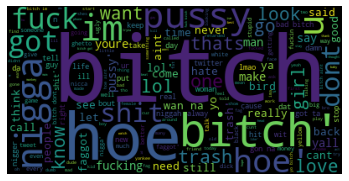

In [104]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud().generate(str(clean_tweet))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [106]:
Combined.to_csv('ProcessedLabeledData.csv')